In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('demand-forecasting-kernels-only/train.csv')

In [3]:
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [4]:
df['store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [5]:
df['item'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [7]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [8]:
df_test = pd.read_csv('demand-forecasting-kernels-only/test.csv')

In [9]:
df_test

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1
...,...,...,...,...
44995,44995,2018-03-27,10,50
44996,44996,2018-03-28,10,50
44997,44997,2018-03-29,10,50
44998,44998,2018-03-30,10,50


In [10]:
df_test.dtypes

id        int64
date     object
store     int64
item      int64
dtype: object

In [11]:
df_test['id'].unique()

array([    0,     1,     2, ..., 44997, 44998, 44999], dtype=int64)

In [12]:
df.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [13]:
df_test.isna().sum()

id       0
date     0
store    0
item     0
dtype: int64

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df['date'] = pd.to_datetime(df['date'])

In [16]:
df.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

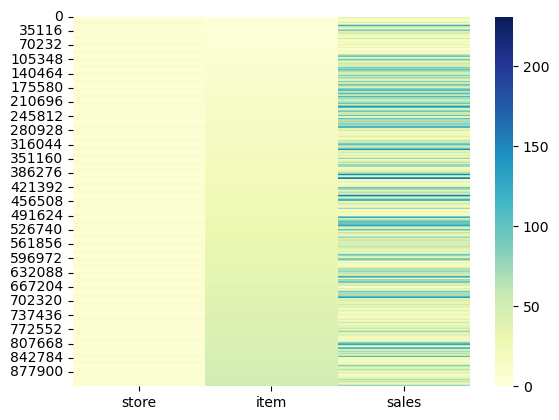

In [17]:
sns.heatmap(df.drop(columns = ['date']), cmap='YlGnBu')
plt.show()

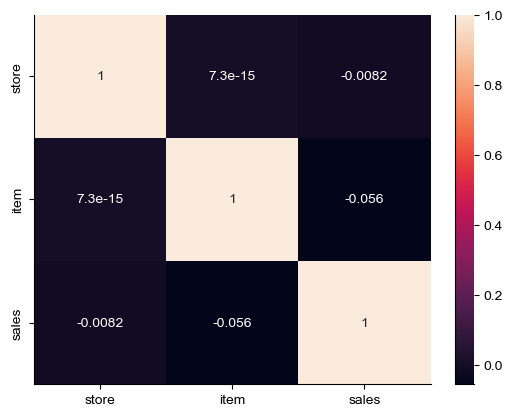

In [18]:
corr_matrix = df.corr()

# plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True)

# show the plot
sns.set_style("whitegrid")
sns.despine()
plt.show()

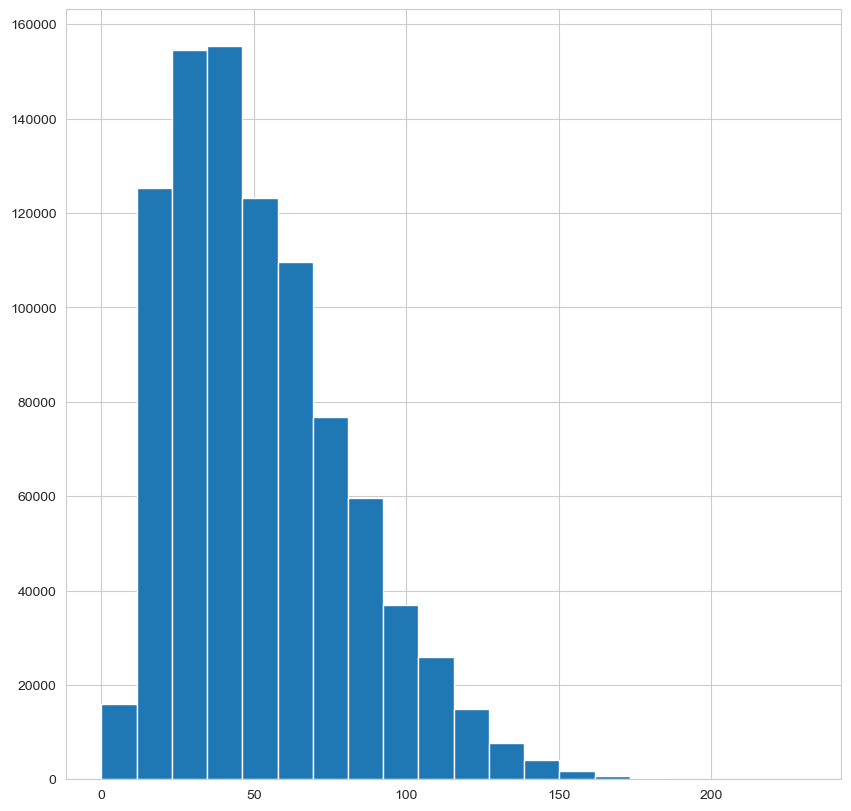

In [19]:
df['sales'].hist(bins=20, figsize=(10,10))
plt.show()

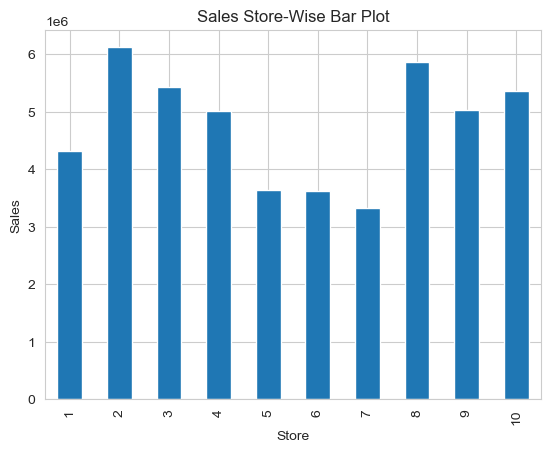

In [20]:
# group data by store and calculate total sales
store_sales = df.groupby('store')['sales'].sum()

# create a bar plot of sales store-wise
store_sales.plot(kind='bar')

# set axis labels and title
plt.xlabel('Store')
plt.ylabel('Sales')
plt.title('Sales Store-Wise Bar Plot')

# show the plot
plt.show()

In [21]:
# extract year component
df['year'] = df['date'].dt.year

# extract month component
df['month'] = df['date'].dt.month

# extract day component
df['day'] = df['date'].dt.day

In [22]:
df

,date,store,item,sales,year,month,day
0,2013-01-01,1,1,13,2013,1,1
1,2013-01-02,1,1,11,2013,1,2
2,2013-01-03,1,1,14,2013,1,3
3,2013-01-04,1,1,13,2013,1,4
4,2013-01-05,1,1,10,2013,1,5
...,...,...,...,...,...,...,...
912995,2017-12-27,10,50,63,2017,12,27
912996,2017-12-28,10,50,59,2017,12,28
912997,2017-12-29,10,50,74,2017,12,29
912998,2017-12-30,10,50,62,2017,12,30


In [23]:
# convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# create day of the week feature
df['day_of_week'] = df['date'].dt.dayofweek

# create month name feature
df['month_name'] = df['date'].dt.strftime('%B')

In [24]:
df

,date,store,item,sales,year,month,day,day_of_week,month_name
0,2013-01-01,1,1,13,2013,1,1,1,January
1,2013-01-02,1,1,11,2013,1,2,2,January
2,2013-01-03,1,1,14,2013,1,3,3,January
3,2013-01-04,1,1,13,2013,1,4,4,January
4,2013-01-05,1,1,10,2013,1,5,5,January
...,...,...,...,...,...,...,...,...,...
912995,2017-12-27,10,50,63,2017,12,27,2,December
912996,2017-12-28,10,50,59,2017,12,28,3,December
912997,2017-12-29,10,50,74,2017,12,29,4,December
912998,2017-12-30,10,50,62,2017,12,30,5,December


In [25]:
df.set_index('date', inplace=True)
# resample data to monthly level and sum sales
monthly_data = df[['sales']].resample('M').sum()

In [26]:
monthly_data

,sales
date,
2013-01-31,454904
2013-02-28,459417
2013-03-31,617382
2013-04-30,682274
2013-05-31,763242
2013-06-30,795597
2013-07-31,855922
2013-08-31,766761
2013-09-30,689907


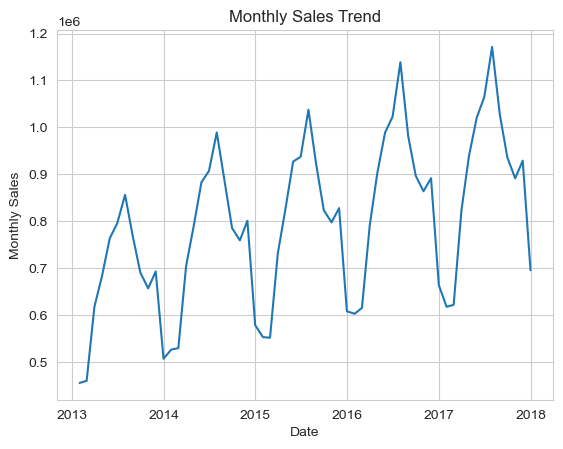

In [27]:
plt.plot(monthly_data.index, monthly_data['sales'])
plt.xlabel('Date')
plt.ylabel('Monthly Sales')
plt.title('Monthly Sales Trend')
plt.show()

In [28]:
df['store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [29]:
monthly_data.mean()

sales    795075.2
dtype: float64

In [30]:
monthly_data.sum()

sales    47704512
dtype: int64

In [31]:
monthly_data.var()

sales    2.989502e+10
dtype: float64

In [32]:
monthly_data.cov()

,sales
sales,2.989502e+10


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   store        913000 non-null  int64 
 1   item         913000 non-null  int64 
 2   sales        913000 non-null  int64 
 3   year         913000 non-null  int64 
 4   month        913000 non-null  int64 
 5   day          913000 non-null  int64 
 6   day_of_week  913000 non-null  int64 
 7   month_name   913000 non-null  object
dtypes: int64(7), object(1)
memory usage: 62.7+ MB


In [34]:
df

,store,item,sales,year,month,day,day_of_week,month_name
date,,,,,,,,
2013-01-01,1,1,13,2013,1,1,1,January
2013-01-02,1,1,11,2013,1,2,2,January
2013-01-03,1,1,14,2013,1,3,3,January
2013-01-04,1,1,13,2013,1,4,4,January
2013-01-05,1,1,10,2013,1,5,5,January
...,...,...,...,...,...,...,...,...
2017-12-27,10,50,63,2017,12,27,2,December
2017-12-28,10,50,59,2017,12,28,3,December
2017-12-29,10,50,74,2017,12,29,4,December


In [35]:
df['month_name'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [36]:
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

# Map month_name column to numerical values using the mapping
df['month_num'] = df['month_name'].map(month_map)

In [37]:
df

,store,item,sales,year,month,day,day_of_week,month_name,month_num
date,,,,,,,,,
2013-01-01,1,1,13,2013,1,1,1,January,1
2013-01-02,1,1,11,2013,1,2,2,January,1
2013-01-03,1,1,14,2013,1,3,3,January,1
2013-01-04,1,1,13,2013,1,4,4,January,1
2013-01-05,1,1,10,2013,1,5,5,January,1
...,...,...,...,...,...,...,...,...,...
2017-12-27,10,50,63,2017,12,27,2,December,12
2017-12-28,10,50,59,2017,12,28,3,December,12
2017-12-29,10,50,74,2017,12,29,4,December,12


In [38]:
df.drop(columns = ['month_name'], inplace = True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   store        913000 non-null  int64
 1   item         913000 non-null  int64
 2   sales        913000 non-null  int64
 3   year         913000 non-null  int64
 4   month        913000 non-null  int64
 5   day          913000 non-null  int64
 6   day_of_week  913000 non-null  int64
 7   month_num    913000 non-null  int64
dtypes: int64(8)
memory usage: 62.7 MB


In [40]:
df['item'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [41]:
df['year'].unique()

array([2013, 2014, 2015, 2016, 2017], dtype=int64)

In [42]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [43]:
df.drop(columns = ['month_num'], inplace = True)

In [44]:
df

,store,item,sales,year,month,day,day_of_week
date,,,,,,,
2013-01-01,1,1,13,2013,1,1,1
2013-01-02,1,1,11,2013,1,2,2
2013-01-03,1,1,14,2013,1,3,3
2013-01-04,1,1,13,2013,1,4,4
2013-01-05,1,1,10,2013,1,5,5
...,...,...,...,...,...,...,...
2017-12-27,10,50,63,2017,12,27,2
2017-12-28,10,50,59,2017,12,28,3
2017-12-29,10,50,74,2017,12,29,4


In [45]:
df_test

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1
...,...,...,...,...
44995,44995,2018-03-27,10,50
44996,44996,2018-03-28,10,50
44997,44997,2018-03-29,10,50
44998,44998,2018-03-30,10,50


In [46]:
df_test['id'].unique()

array([    0,     1,     2, ..., 44997, 44998, 44999], dtype=int64)

In [47]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45000 non-null  int64 
 1   date    45000 non-null  object
 2   store   45000 non-null  int64 
 3   item    45000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ MB


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   store        913000 non-null  int64
 1   item         913000 non-null  int64
 2   sales        913000 non-null  int64
 3   year         913000 non-null  int64
 4   month        913000 non-null  int64
 5   day          913000 non-null  int64
 6   day_of_week  913000 non-null  int64
dtypes: int64(7)
memory usage: 55.7 MB


In [64]:
df.to_csv('demand_forcasting_system_preprocessed.csv')

In [49]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Split the DataFrame into training and validation sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Train a SARIMA model on the training set
order = (1, 0, 1)
seasonal_order = (1, 0, 1, 12)
model = SARIMAX(train['sales'], order=order, seasonal_order=seasonal_order)
result = model.fit()

# Make predictions on the validation set and compute the mean squared error
y_pred = result.predict(start=test.index[0], end=test.index[-1])
mse = mean_squared_error(test['sales'], y_pred)
print(f"Mean Squared Error: {mse}")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MemoryError: Unable to allocate 1.07 GiB for an array with shape (14, 14, 730400) and data type float64

In [63]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Load data
#df = pd.read_csv("sales_data.csv", parse_dates=["date"], index_col="date")

# Prepare data
X = df.drop("sales", axis=1)
y = df["sales"]

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define model
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=5)

# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)


RMSE: 25.171702225600193


In [65]:
import joblib

# Save model
joblib.dump(model, "xgboost_sales_forcasting.joblib")

['xgboost_sales_forcasting.joblib']